In [1]:
#from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt

# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 5))
mpl.rc('image', cmap='gray')


In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims
import trackpy as tp
from PIL import Image

In [3]:
#To read single tiff stack
# To read standard files, including tiff stacks, we can use pims.open
frames_single_tiff1=pims.open('C://Users//kande//OneDrive//Desktop//Particle_trac//06_15_2023//img.tif')
frames_single_tiff1=pims.as_gray(frames_single_tiff1)

In [5]:
#To read multiple images from a directory
#Also, let us convert the images to grey by just using the green channel image
#We can also use built in method: pims.as_grey
@pims.pipeline
def gray(image):
    return np.invert(image[:, :, 1]) #[0:200,700:900]>210)   Take just the green channel

frames = gray(pims.open('D://movie_frames//*.tif'))

In [6]:
frames

(ImageSequence,) processed through proc_func. Original repr:
    <Frames>
    Source: D:\movie_frames\*.tif
    Length: 344 frames
    Frame Shape: (1040, 1388, 3)
    Pixel Datatype: uint8

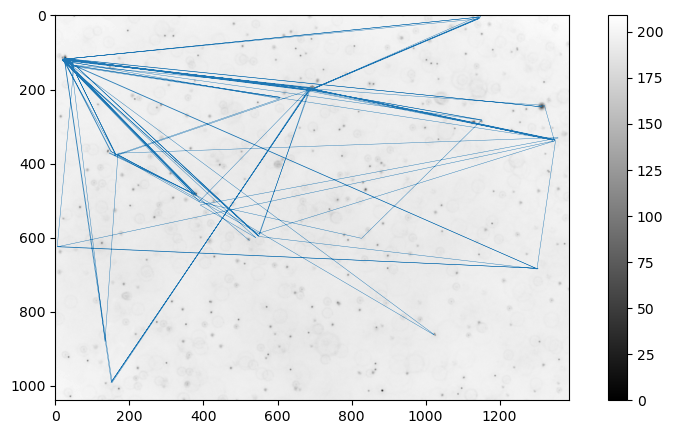

In [8]:
# Making the list of x and y co-ordinate of the particle
x_loc=[]
y_loc=[]
for frame in frames:
    max_pixel_location = np.argwhere(frame== np.min(frame))[0]

    # Coordinates of the maximum pixel value
    x, y = max_pixel_location[1], max_pixel_location[0]
    x_loc.append(x)
    y_loc.append(y)
plt.imshow(frames[300])
plt.colorbar()

plt.plot(x_loc,y_loc,linewidth=.3)

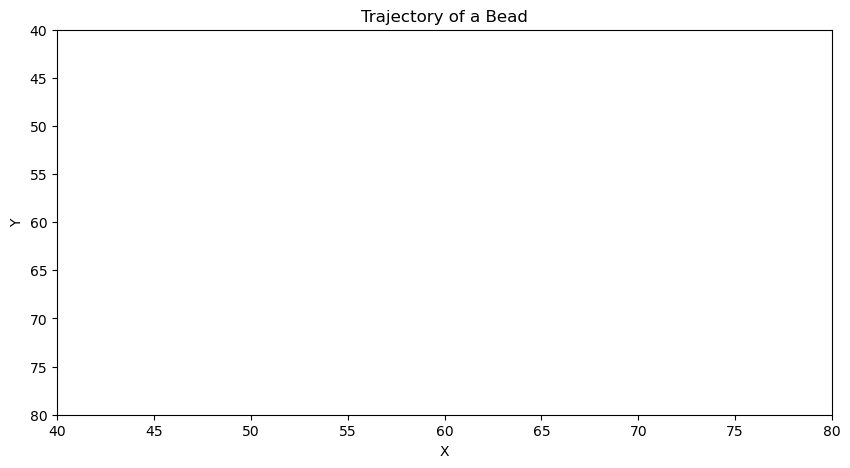

In [9]:
plt.plot(x_loc,y_loc,linewidth=.5)
plt.xlim(40,80)
plt.ylim(40,80)
plt.gca().invert_yaxis()
plt.title("Trajectory of a Bead")
plt.xlabel("X")
plt.ylabel("Y")
plt.savefig('Trajctory')

In [ ]:
f = tp.locate(frames, 3, invert=False)

In [ ]:
f.head()  # shows the first few rows of data

In [ ]:
tp.annotate(f, frames[100])

In [ ]:
fig, ax = plt.subplots()
ax.hist(f['mass'], bins=20)

# Optionally, label the axes.
ax.set(xlabel='mass', ylabel='count')

In [ ]:
f = tp.batch(frames[200:700], 11, invert=False)

In [ ]:
t = tp.link(f, search_range=10, memory=5)

In [ ]:
t.head()

In [ ]:
t1 = tp.filter_stubs(t, 25)
# Compare the number of particles in the unfiltered and filtered data.
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())

In [ ]:
plt.figure()
tp.mass_size(t1.groupby('particle').mean()); # convenience function -- just plots size vs. mass

In [ ]:
t2 = t1[((t1['mass'] > 50) & (t1['size'] < 2.6) &
         (t1['ecc'] < 0.3))]

In [ ]:
plt.figure()
tp.annotate(t2[t2['frame'] == 0], frames[50]);

In [ ]:
plt.figure()
tp.plot_traj(t2)

In [ ]:
d = tp.compute_drift(t2)

In [ ]:
d.plot()
plt.show()

In [ ]:
tm = tp.subtract_drift(t2.copy(), d)

In [ ]:
ax = tp.plot_traj(tm)
plt.show()

In [ ]:
im = tp.imsd(tm, 2.55, 30)  # microns per pixel = 100/285., frames per second = 24

In [ ]:
fig, ax = plt.subplots()
ax.plot(im.index, im, 'k-', alpha=0.1)  # black lines, semitransparent
ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]',
       xlabel='lag time $t$')
ax.set_xscale('log')
ax.set_yscale('log')

In [ ]:
em = tp.emsd(tm, 100/285., 24) # microns per pixel = 100/285., frames per second = 24

In [ ]:
fig, ax = plt.subplots()
ax.plot(em.index, em, 'o')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]',
       xlabel='lag time $t$')
ax.set(ylim=(1e-2, 10))

In [ ]:
plt.figure()
plt.ylabel(r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]')
plt.xlabel('lag time $t$');
tp.utils.fit_powerlaw(em)  # performs linear best fit in log space, plots]

In [ ]:
import cv2
image1= cv2.imread("C://Users//kande//OneDrive//Desktop//Particle_trac//frame//09_06_2023//frames_fb30//frame_200.tif")
background_img=cv2.imread("C://Users//kande//OneDrive//Desktop//Particle_trac//frame//09_06_2023//frames_fb30//frame_210.tif")

In [ ]:
result_image = cv2.subtract(image1[:,:,1],background_img[:,:,1])

plt.imshow(result_image)
plt.axis('off')
plt.savefig("img_withoutbac")

In [2]:
import cv2

# Load the video file
video_path = "C://Users//kande//OneDrive//Desktop//Particle_trac//09_20_2023//fvid1.h264"
cap = cv2.VideoCapture(video_path)

# Check if the video opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Define the start and end timestamps (in seconds)
start_time = 20  # Adjust this to your desired start time
end_time = 50    # Adjust this to your desired end time

# Calculate the start and end frames based on timestamps
frame_rate = int(cap.get(cv2.CAP_PROP_FPS))
start_frame = int(start_time * frame_rate)
end_frame = int(end_time * frame_rate)

# Set the video writer for the output
output_path = 'output_video.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for MP4 format
output = cv2.VideoWriter(output_path, fourcc, frame_rate, (int(cap.get(3)), int(cap.get(4))))

# Loop through the frames and write the selected portion to the output
frame_number = 0

while True:
    ret, frame = cap.read()

    if not ret:
        break

    if frame_number >= start_frame and frame_number <= end_frame:
        output.write(frame)

    if frame_number > end_frame:
        break

    frame_number += 1

# Release the video objects
cap.release()
output.release()

print(f"Extracted frames from {start_time} to {end_time} seconds to {output_path}.")


Extracted frames from 20 to 50 seconds to output_video.mp4.
